In [5]:
import pandas as pd
import json
import numpy as np
pd.set_option('display.max_columns', None)

# 1. Data Loading

In [7]:
data = pd.read_json('transactions/transactions.txt', lines=True)

In [8]:
data.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,0.00,,,,False,,,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,111.33,,,,False,,,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,136.08,,,,False,,,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,01,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,323.48,,,,False,,,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,01,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,550.82,,,,False,,,False


In [9]:
len(data)

641914

In [6]:
data.to_csv('fr_transactions/transactions.csv', sep='|') 

In [7]:
df = pd.read_csv('fr_transactions/transactions.csv', sep='|')

In [8]:
df.head(5)

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,1.0,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False
1,1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,1.0,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,1.0,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,1.0,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,1.0,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False


In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,1.0,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,1.0,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,1.0,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,1.0,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,1.0,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False
5,733493772,733493772,5000,4449.18,2016-01-16T21:35:27,9.80,Fresh eCards,US,US,5.0,1.0,online_gifts,02/2021,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False
6,733493772,733493772,5000,4439.38,2016-01-24T07:54:01,247.99,Uber,NaN,US,5.0,1.0,rideshare,01/2026,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,560.62,NaN,NaN,NaN,False,NaN,NaN,False
7,733493772,733493772,5000,4191.39,2016-01-26T05:28:24,0.00,Universe Massage #95463,US,US,5.0,1.0,personal care,12/2031,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,NaN,808.61,NaN,NaN,NaN,False,NaN,NaN,False
8,733493772,733493772,5000,4191.39,2016-01-26T12:18:14,11.54,Universe Massage #70014,US,US,5.0,1.0,personal care,04/2024,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,808.61,NaN,NaN,NaN,True,NaN,NaN,False
9,733493772,733493772,5000,4179.85,2016-01-26T12:19:15,11.54,Universe Massage #70014,US,US,5.0,1.0,personal care,04/2024,2014-08-03,2014-08-03,492,492,9184,REVERSAL,False,NaN,820.15,NaN,NaN,NaN,True,NaN,NaN,False


# 2. Data Overview

In [11]:
missing_data = df.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(df.shape[0]-missing_data['missing values'])/df.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,posOnPremises,641914,0.000000
1,merchantZip,641914,0.000000
2,merchantState,641914,0.000000
3,merchantCity,641914,0.000000
4,echoBuffer,641914,0.000000
5,recurringAuthInd,641914,0.000000
6,acqCountry,3913,99.390417
7,posEntryMode,3345,99.478902
8,merchantCountryCode,624,99.902791
9,transactionType,589,99.908243


In [12]:
df = df.drop(columns=['posOnPremises', 'merchantZip', 'merchantState', 'merchantCity', 'echoBuffer', 'recurringAuthInd'])

In [13]:
df = df.drop(columns=['acqCountry', 'posEntryMode', 'merchantCountryCode', 'transactionType', 'posConditionCode'])

In [14]:
df.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
isFraud                        bool
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
dtype: object

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

Text(0.5, 1.0, 'Class Distributions \n (isFraud)')

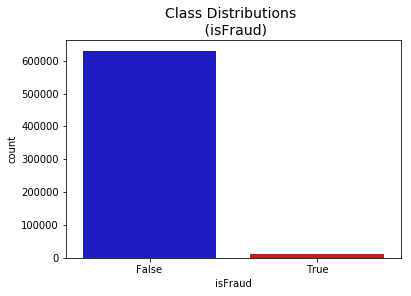

In [16]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('isFraud', data=df, palette=colors)
plt.title('Class Distributions \n (isFraud)', fontsize=14)

# 3. Feature Engineering

In [17]:
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,False,550.82,False,False


In [18]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
df['transactionTime'] = df['transactionDateTime'].dt.strftime('%H')

In [20]:
df['transactionDate'] = df['transactionDateTime'].dt.strftime('%Y-%m-%d')

In [21]:
df['transactionTime'] = df['transactionTime'].apply(int)

In [22]:
#more feature engineering

df['currentExpDate'] = pd.to_datetime(df['currentExpDate'], format='%m/%Y')
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'], format='%Y-%m-%d')
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'], format='%Y-%m-%d')

In [23]:
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transactionTime,transactionDate
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,True,0.00,False,False,19,2016-01-08
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,9184,False,111.33,False,False,22,2016-01-09
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,9184,False,136.08,False,False,13,2016-01-11
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,9184,True,323.48,False,False,22,2016-01-11
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,9184,False,550.82,False,False,1,2016-01-16


# 4. Data Visualization

In [24]:
df.dtypes

accountNumber                        int64
customerId                           int64
creditLimit                          int64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                              int64
enteredCVV                           int64
cardLast4Digits                      int64
isFraud                               bool
currentBalance                     float64
cardPresent                           bool
expirationDateKeyInMatch              bool
transactionTime                      int64
transactionDate                     object
dtype: object

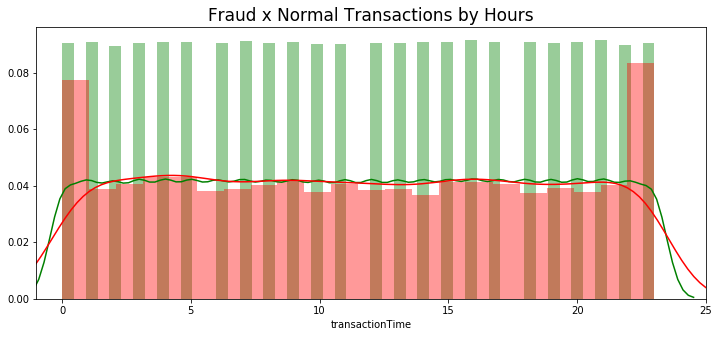

In [25]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['isFraud'] == False]["transactionTime"], 
             color='g')
sns.distplot(df[df['isFraud'] == True]["transactionTime"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

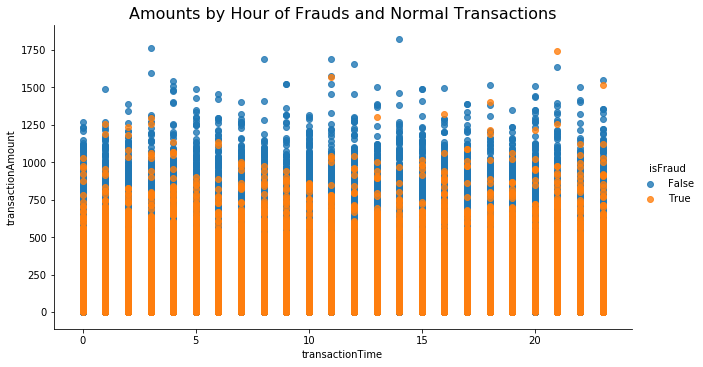

In [26]:
ax = sns.lmplot(y="transactionAmount", x="transactionTime", fit_reg=False,aspect=1.8,
                data=df, hue='isFraud')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)

plt.show()

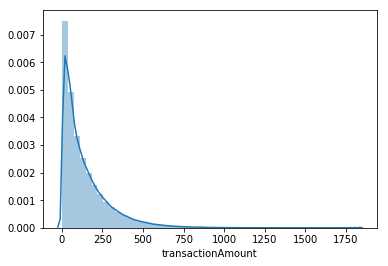

In [27]:
sns.distplot(df['transactionAmount'])

In [28]:
df_fraud = df[df['isFraud'] == True]
df_normal = df[df['isFraud'] == False]

print("Fraud transaction statistics")
print(df_fraud["transactionAmount"].describe())
print("\nNormal transaction statistics")
print(df_normal["transactionAmount"].describe())

Fraud transaction statistics
count    11302.000000
mean       232.603744
std        189.654934
min          0.000000
25%         91.475000
50%        185.215000
75%        324.817500
max       1743.510000
Name: transactionAmount, dtype: float64

Normal transaction statistics
count    630612.000000
mean        133.416128
std         145.583066
min           0.000000
25%          31.810000
50%          84.340000
75%         186.440000
max        1825.250000
Name: transactionAmount, dtype: float64


In [29]:
df['Amount_log'] = np.log(df.transactionAmount + 0.01)

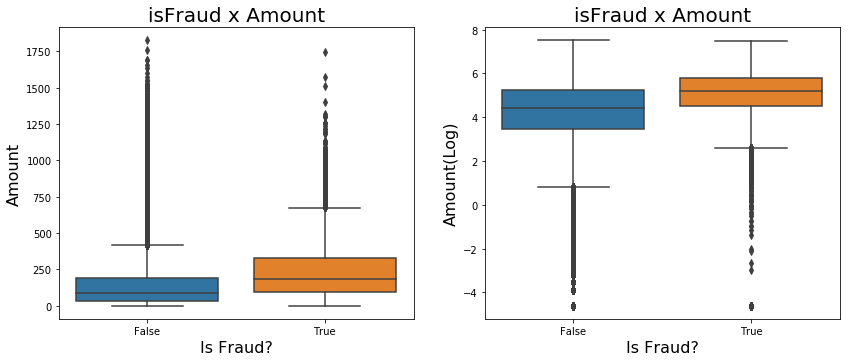

In [30]:
plt.figure(figsize=(14,6))
#I will explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="isFraud",y="transactionAmount", data=df)
ax.set_title("isFraud x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="isFraud",y="Amount_log", data=df)
ax1.set_title("isFraud x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

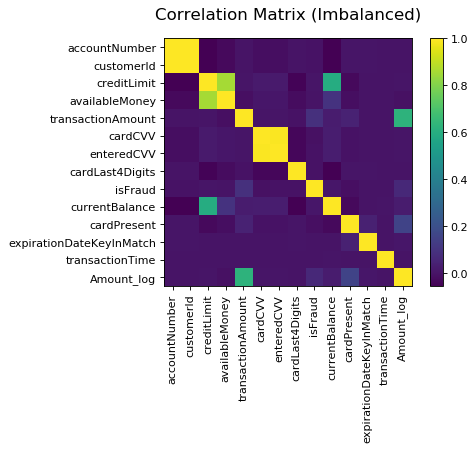

In [31]:
corr = df.corr()
plt.figure(num=None, dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix (Imbalanced)', fontsize=15)
plt.show()

Text(0.5, 1.0, 'currentBalance vs isFraud')

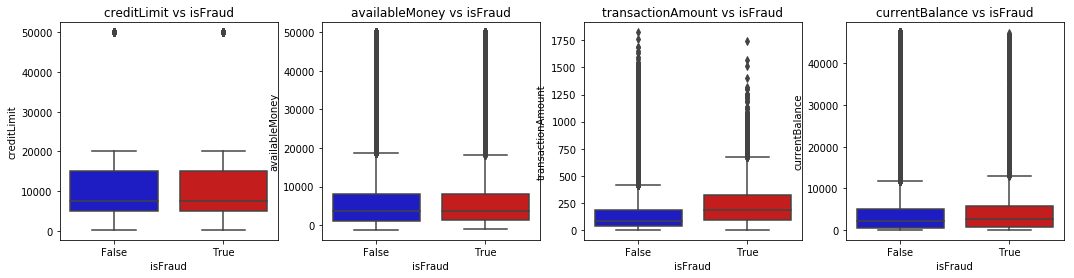

In [32]:
f, axes = plt.subplots(ncols=4, figsize=(18,4))

sns.boxplot(x="isFraud", y="creditLimit", data=df, palette=colors, ax=axes[0])
axes[0].set_title('creditLimit vs isFraud')

sns.boxplot(x="isFraud", y="availableMoney", data=df, palette=colors, ax=axes[1])
axes[1].set_title('availableMoney vs isFraud')

sns.boxplot(x="isFraud", y="transactionAmount", data=df, palette=colors, ax=axes[2])
axes[2].set_title('transactionAmount vs isFraud')

sns.boxplot(x="isFraud", y="currentBalance", data=df, palette=colors, ax=axes[3])
axes[3].set_title('currentBalance vs isFraud')

In [33]:
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transactionTime,transactionDate,Amount_log
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,True,0.00,False,False,19,2016-01-08,4.712589
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,9184,False,111.33,False,False,22,2016-01-09,3.209229
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,9184,False,136.08,False,False,13,2016-01-11,5.233299
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,9184,True,323.48,False,False,22,2016-01-11,5.426491
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,9184,False,550.82,False,False,1,2016-01-16,-4.605170


In [34]:
df = df.drop(columns=['transactionDate', 'dateOfLastAddressChange', 'accountOpenDate', 'currentExpDate', 'transactionDateTime', 'customerId', 'accountNumber' ])

In [35]:
df = df.drop(columns=['cardCVV', 'enteredCVV', 'cardLast4Digits'])

In [38]:
df.head(5)

,creditLimit,availableMoney,transactionAmount,merchantName,merchantCategoryCode,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transactionTime,Amount_log
0,5000,5000.00,111.33,Lyft,rideshare,True,0.00,False,False,19,4.712589
1,5000,4888.67,24.75,Uber,rideshare,False,111.33,False,False,22,3.209229
2,5000,4863.92,187.40,Lyft,rideshare,False,136.08,False,False,13,5.233299
3,5000,4676.52,227.34,Lyft,rideshare,True,323.48,False,False,22,5.426491
4,5000,4449.18,0.00,Lyft,rideshare,False,550.82,False,False,1,-4.605170


In [41]:
df['merchantName']  = df['merchantName'] .astype('category')
df['merchantName'] = df['merchantName'].cat.codes

df['cardPresent']  = df['cardPresent'] .astype('category')
df['cardPresent'] = df['cardPresent'].cat.codes

df['expirationDateKeyInMatch']  = df['expirationDateKeyInMatch'] .astype('category')
df['expirationDateKeyInMatch'] = df['expirationDateKeyInMatch'].cat.codes

In [42]:
df['merchantCategoryCode']  = df['merchantCategoryCode'].astype('category')
df['merchantCategoryCode'] = df['merchantCategoryCode'].cat.codes

In [43]:
df.head(5)

,creditLimit,availableMoney,transactionAmount,merchantName,merchantCategoryCode,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transactionTime,Amount_log
0,5000,5000.00,111.33,1066,17,True,0.00,0,0,19,4.712589
1,5000,4888.67,24.75,2086,17,False,111.33,0,0,22,3.209229
2,5000,4863.92,187.40,1066,17,False,136.08,0,0,13,5.233299
3,5000,4676.52,227.34,1066,17,True,323.48,0,0,22,5.426491
4,5000,4449.18,0.00,1066,17,False,550.82,0,0,1,-4.605170


In [44]:
df.loc[df['isFraud'] == True, 'isFraud'] = '1'

In [45]:
df.loc[df['isFraud'] == False, 'isFraud'] = '0'

In [93]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

In [94]:
X = df.drop(["isFraud"], axis=1).values #Setting the X to do the split
y = df["isFraud"].values # transforming the values in array

In [102]:
# the function that we will use to better evaluate the model
def print_results(headline, true_value, pred, average=None):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred, average=None)))
    print("recall: {}".format(recall_score(true_value, pred, average=None)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2, average=None)))

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


normal data distribution: Counter({'0': 630612, '1': 11302})
SMOTE data distribution: Counter({'1': 630612, '0': 630612})
